In [1]:
#Import Python Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import FuncFormatter, MultipleLocator

import xml.etree.ElementTree as etree 
from datetime import datetime, timedelta
import os
import json
import pandas as pd
import numpy as np
from pytz import common_timezones, all_timezones, timezone

In [2]:
# Define name and path of data file
input_file = 'activity_898238015_30.csv'
input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file_path = os.path.join(input_dir , input_file)

output_file = 'activity_898238015_40.csv'
output_dir = os.path.join("/", "opt","jupyter","data","csv" )
output_file_path = os.path.join(input_dir , output_file)

print ("Input file is (full path)  ", input_file_path)
print ("Output file is (full path)  ", output_file_path)


Input file is (full path)   /opt/jupyter/data/csv/activity_898238015_30.csv
Output file is (full path)   /opt/jupyter/data/csv/activity_898238015_40.csv


In [3]:
# Load data file into a Pandas data frame for inspection
df = pd.read_csv(input_file_path, index_col = 'time',  parse_dates=True)

# Define and set data source time zone
tz_source = 'UTC'
# Set timezone in our data frame
df = df.tz_localize( tz_source )

# Convert to local time zone - Dublin, Ireland
tz_local = timezone('Europe/Dublin')
df = df.tz_convert(tz_local  )

In [4]:
df_moving = df[df.moving].copy()
df_moving = df_moving.reset_index()
df_moving['interval10'] = df_moving.distance.apply(lambda x: (int (x / 10) + 1) * 10 )
#df_moving['interval1000'] = df_moving.distance.apply(lambda x: int (x /1000))
#df_moving['interval100'] = df_moving.distance.apply(lambda x: int (x /100))

In [46]:
def outer (x):
    print (str('hi'))
    def inner (y,z):
        x(y,z)
        print (str(y))
        print (str(z))
    return inner


In [50]:
def something(x,y):
    print( 'I am something' )
    
xx = outer(something)
xx(1,2)

hi
I am something
1
2


In [5]:
def wrap_axes(plot_axes_in):
    def inner(df,  plot_control):
        plot_axes_in( df,  plot_control)
        
        for label in axes[ plot_control['axes_number'] ].xaxis.get_ticklabels():
            label.set_rotation(0.0)
            label.set_horizontalalignment('center')
            label.set_color(plot_control['plot_color'])
        
        for label in axes[ plot_control['axes_number'] ].yaxis.get_ticklabels():
            label.set_color(plot_control['plot_color'])
        
        for tick in axes[ plot_control['axes_number'] ].xaxis.get_minor_ticks():
            tick.label.set_fontsize(7)
            tick.label.set_color(plot_control['plot_color'])

        axes[ plot_control['axes_number'] ].set_axis_bgcolor('linen')
        axes[ plot_control['axes_number'] ].set_title( plot_control['plot_title'], 
                                                  color= plot_control['plot_color'],
                                                 weight='normal',)
        axes[ plot_control['axes_number'] ].set_xlabel( plot_control['xlabel'] )
        axes[ plot_control['axes_number'] ].set_ylabel( plot_control['ylabel'], color= plot_control['plot_color'],)
    
        if plot_control['ylimit_qty'] > 0:
            axes[ plot_control['axes_number'] ].set_ylim( 
                [ min( df[plot_control['column']][df[ plot_control['column']]>0 ] ) - plot_control['ylimit_qty'], 
                                            max(df[ plot_control['column'] ]) + plot_control['ylimit_qty'] ])
        
        if plot_control['show_avg']:
        
            if plot_control['column'] == 'speed':
                text_value_format = '{:.1f}'
                avg_value = df[df.moving == True ][plot_control['column']].mean()
            else:
                text_value_format = '{:.0f}'
                avg_value = df[df.moving == True ][plot_control['column']].median()
            
        
            max_value = df[ df.moving == True ][plot_control['column']].max()
        
            text_content = '{:<6}'.format('avg:') + text_value_format.format(avg_value) +\
                        ' ' + plot_control['units'] +   '\n' +\
                        '{:<6}'.format('max:') + text_value_format.format(max_value) +\
                        ' ' + plot_control['units']
            axes[ plot_control['axes_number'] ].axhline(avg_value, 
                        color= plot_control['plot_color'], ls = 'dotted')
            axes[ plot_control['axes_number'] ].text(.82, .07, text_content , family = 'monospace',
                style='normal', transform=axes[ plot_control['axes_number'] ].transAxes, color='white',
                bbox={'facecolor': plot_control['plot_color'] , 'color': plot_control['plot_color'] ,
                      'alpha':0.7, 'pad':5})
        
    return inner
    

In [6]:
@wrap_axes
def plot_axes( df, plot_control ):

    df[ plot_control['column'] ].plot(ax=axes[ plot_control['axes_number']],  
                kind='area',color= plot_control['plot_color'] ,alpha = .7)    
    
    y_max = axes[ plot_control['axes_number'] ].get_ylim()[1]
    
    df[ 'breaks' ].apply(lambda y: y * y_max) .plot(ax=axes[ plot_control['axes_number']],  
                kind='area',color= 'lightgrey' ,alpha = 1.); 
        

    
    
    #format time labesl - show hour and minutes only
    axes[ plot_control['axes_number'] ].xaxis.set_major_locator( dates.MinuteLocator(byminute=0) )
    axes[ plot_control['axes_number'] ].xaxis.set_minor_locator( dates.MinuteLocator(byminute=[15,30 ,45]) )
    axes[ plot_control['axes_number'] ].xaxis.set_major_formatter(dates.DateFormatter('%H:%M', tz=tz_local))
    axes[ plot_control['axes_number'] ].xaxis.set_minor_formatter(dates.DateFormatter('%M', tz=tz_local))
    #axes[ plot_control['axes_number'] ].set_xlim((datetime(2015,9,13,6,0,0),datetime(2015,9,13,12,0,0 )))
    
    
    #for i in range ( len(axes[ plot_control['axes_number'] ].xaxis.get_ticklabels())):
    #    axes[  plot_control['axes_number']].xaxis.get_ticklabels()[i].set_rotation(0.0)
    #    axes[  plot_control['axes_number']].xaxis.get_ticklabels()[i].set_horizontalalignment('center')
    #    axes[  plot_control['axes_number']].xaxis.get_ticklabels()[i].set_color(plot_control['plot_color'])
    
    '''
    for label in axes[ plot_control['axes_number'] ].xaxis.get_ticklabels():
        label.set_rotation(0.0)
        label.set_horizontalalignment('center')
        label.set_color(plot_control['plot_color'])
        
    for label in axes[ plot_control['axes_number'] ].yaxis.get_ticklabels():
        label.set_color(plot_control['plot_color'])
        
    for tick in axes[ plot_control['axes_number'] ].xaxis.get_minor_ticks():
        tick.label.set_fontsize(7)
        tick.label.set_color(plot_control['plot_color'])

    axes[ plot_control['axes_number'] ].set_axis_bgcolor('linen')
    axes[ plot_control['axes_number'] ].set_title( plot_control['plot_title'], 
                                                  color= plot_control['plot_color'],
                                                 weight='normal',)
    axes[ plot_control['axes_number'] ].set_xlabel( plot_control['xlabel'] )
    axes[ plot_control['axes_number'] ].set_ylabel( plot_control['ylabel'], color= plot_control['plot_color'],)
    
    if plot_control['ylimit_qty'] > 0:
        axes[ plot_control['axes_number'] ].set_ylim( 
            [ min( df[plot_control['column']][df[ plot_control['column']]>0 ] ) - plot_control['ylimit_qty'], 
                                            max(df[ plot_control['column'] ]) + plot_control['ylimit_qty'] ])
        
    if plot_control['show_avg']:
        
        if plot_control['column'] == 'speed':
            text_value_format = '{:.1f}'
            avg_value = df[df.moving == True ][plot_control['column']].mean()
        else:
            text_value_format = '{:.0f}'
            avg_value = df[df.moving == True ][plot_control['column']].median()
            
        
        max_value = df[ df.moving == True ][plot_control['column']].max()
        
        text_content = '{:<6}'.format('avg:') + text_value_format.format(avg_value) +\
                        ' ' + plot_control['units'] +   '\n' +\
                        '{:<6}'.format('max:') + text_value_format.format(max_value) +\
                        ' ' + plot_control['units']
        axes[ plot_control['axes_number'] ].axhline(avg_value, 
                        color= plot_control['plot_color'], ls = 'dotted')
        axes[ plot_control['axes_number'] ].text(.82, .07, text_content , family = 'monospace',
                style='normal', transform=axes[ plot_control['axes_number'] ].transAxes, color='white',
                bbox={'facecolor': plot_control['plot_color'] , 'color': plot_control['plot_color'] ,
                      'alpha':0.7, 'pad':5})
    '''
def plot_stopages():
    df['moving'].apply(lambda x: 0 if x == 1 else 1).plot(ax=axes[5], kind='area', color='blue',alpha = .7); 
    axes[5].set_title('Stopped');
    axes[5].set_xlabel('');
    axes[5].set_ylabel('');

In [7]:
def hours(x, pos):
    'The two args are the value and tick position'
    
    return '{:02d}:00'.format(int(x /3600))

def quarter_hours(x, pos):
    'The two args are the value and tick position'
    if x == 0:
        return ''
    elif x %  3600 == 0:
        return ''
    elif x %  1800 == 0:
        return '30'
    elif x  %  900 == 0:
        if x  %  3600  == 900:
            return '15'
        elif x  %  3600  == 2700:
            return '45'

@wrap_axes
def plot_axes2( df, plot_control ):
    
    df[ plot_control['column'] ].plot(ax=axes[ plot_control['axes_number']],
                kind='area',color= plot_control['plot_color'] ,alpha = .7); 
    
    majorLocator   = MultipleLocator(3600)
    minorLocator   = MultipleLocator(900)
    formatter = FuncFormatter(hours)
    minor_formatter = FuncFormatter(quarter_hours)

    axes[plot_control['axes_number']].xaxis.set_major_locator(majorLocator)
    axes[plot_control['axes_number']].xaxis.set_minor_locator(minorLocator)
    axes[plot_control['axes_number']].xaxis.set_minor_formatter(minor_formatter)
    axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)
    
    '''
    for tick in axes[ plot_control['axes_number'] ].xaxis.get_minor_ticks():
        tick.label.set_fontsize(7)
    
    
    axes[ plot_control['axes_number'] ].set_title( plot_control['plot_title'] );
    axes[ plot_control['axes_number'] ].set_xlabel( plot_control['xlabel'] );
    axes[ plot_control['axes_number'] ].set_ylabel( plot_control['ylabel'] );
    
    if plot_control['ylimit_qty'] > 0:
        axes[ plot_control['axes_number'] ].set_ylim( [min(df[ plot_control['column'] ]) - plot_control['ylimit_qty'], 
                                            max(df[ plot_control['column'] ]) + plot_control['ylimit_qty']])
    
    '''
    
    #axes[ plot_control['axes_number'] ].set_xlim((datetime(2015,9,13,6,0,0),datetime(2015,9,13,12,0,0 )))

In [19]:
def kms(x, pos):
    'The two args are the value and tick position'
    return '{}'.format(int(x /1000))

@wrap_axes
def plot_axes3( df, plot_control ):
    
    df[ [ 'interval10', plot_control['column']]  ].groupby('interval10').mean().\
        plot(ax=axes[ plot_control['axes_number']],
        kind='area',color= plot_control['plot_color'] ,alpha = .7,
            legend=None); 
        
    formatter = FuncFormatter(kms)
    minorLocator   = MultipleLocator(5) 
    axes[plot_control['axes_number']].xaxis.set_major_formatter(formatter)
    axes[plot_control['axes_number']].xaxis.set_minor_formatter(formatter)
    
    
    '''
    axes[ plot_control['axes_number'] ].set_title( plot_control['plot_title'] );
    axes[ plot_control['axes_number'] ].set_xlabel( plot_control['xlabel'] );
    axes[ plot_control['axes_number'] ].set_ylabel( plot_control['ylabel'] );
    
    if plot_control['ylimit_qty'] > 0:
        axes[ plot_control['axes_number'] ].set_ylim( [min(df[ plot_control['column'] ]) - plot_control['ylimit_qty'], 
                                            max(df[ plot_control['column'] ]) + plot_control['ylimit_qty']])
    '''
 
    
    #axes[ plot_control['axes_number'] ].set_xlim((datetime(2015,9,13,6,0,0),datetime(2015,9,13,12,0,0 )))

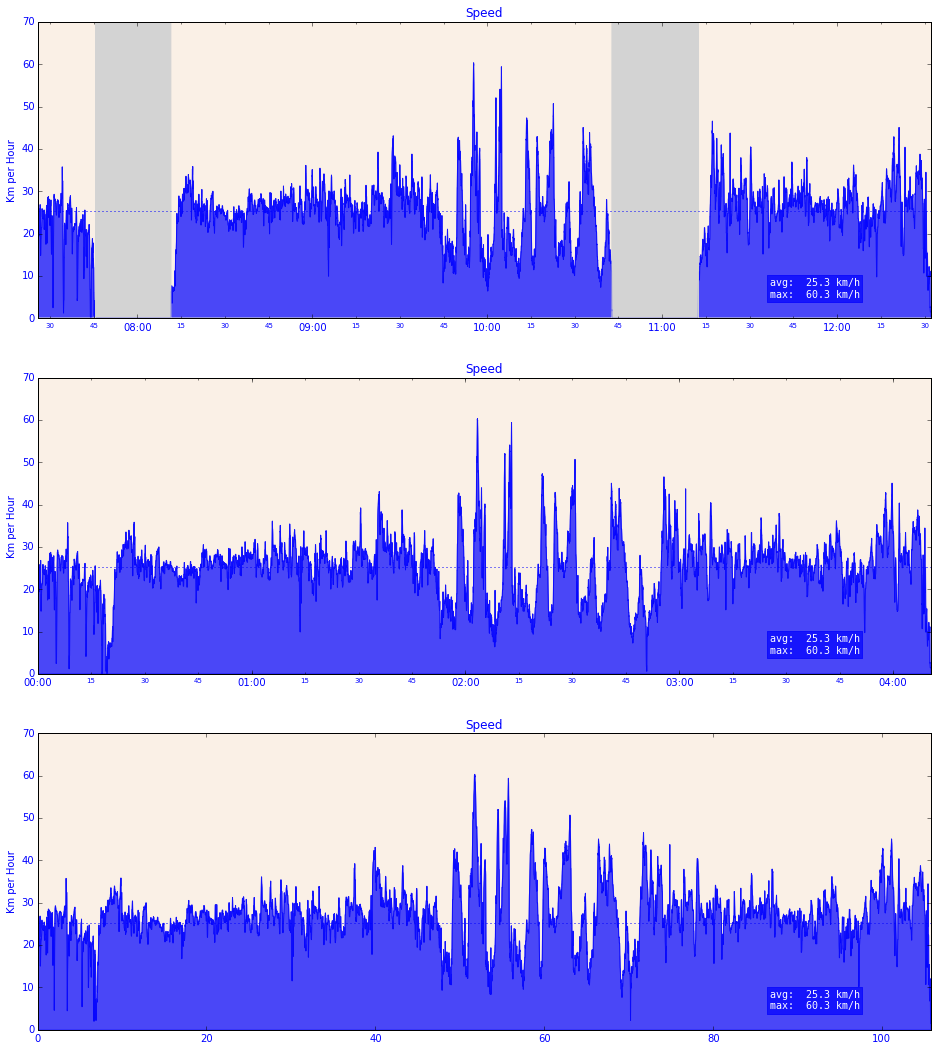

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1,  figsize=(16, 20))

#Speed
plot_control = {'column':'speed', 'axes_number':0, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}

plot_axes(df, plot_control)

#xx = wrap_axes (plot_axes, df, plot_control)
#xx()
#Speed
plot_control = {'column':'speed', 'axes_number':1, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes2(df_moving, plot_control)

#Speed
plot_control = {'column':'speed', 'axes_number':2, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes3(df_moving, plot_control)

In [65]:
def get_duration(time_delta):
    hr = int(( time_delta ).total_seconds()/3600) 
    minu = int ( ( ( time_delta ).total_seconds()/3600 % 1 ) * 60) 
    sec = int ((( ( time_delta ).total_seconds()/3600 % 1 ) * 60 % 1) * 60 ) 
    return "{:02}:{:02}:{:02}".format(hr,minu,sec)

In [70]:
start_time = min(df.index)
end_time = max(df.index)
elapsed_time = end_time - start_time
activity_time = timedelta( seconds= int( df.breaks[~df.breaks].count() ) )
break_time = timedelta( seconds= int( df.breaks[df.breaks].count() ) )
moving_time = timedelta( seconds= int( df.moving[df.moving].count() ) )
non_moving_time = timedelta( seconds= int( df.moving[~df.moving].count() ) )

distance = max(df.distance) 

avg_speed_activity = (distance / activity_time.total_seconds()) * 3.6
avg_speed_moving = (distance / moving_time.total_seconds()) * 3.6

max_speed = df.speed.max()
avg_speed = df.speed[~df.breaks].mean()

max_heart_rate = df.heart_rate.max()
avg_heart_rate = df.heart_rate[~df.breaks].median()

max_cadence = df.cadence.max()
avg_cadence = df.cadence[~df.breaks].median()

start_day_date = datetime.strftime(start_time,'%A, %B %-d, %Y') 
start_hr_min = datetime.strftime(start_time,'%H:%M' )
end_hr_min = datetime.strftime(end_time,'%H:%M' )
print('{:<20}'.format('Start time:') + datetime.strftime(start_time,'%H:%M on %A, %B %-d, %Y') )
print('{:<20}'.format('End time:') + datetime.strftime(end_time,'%H:%M on %A, %B %-d, %Y') )
print('')

print ('{:<20}'.format('Elapsed time:') + '{}'.format( get_duration(elapsed_time) )   ) 
print ('{:<20}'.format('Distance:') + '{:.2f} km'.format( distance / 1000 )   ) 
print ('{:<20}'.format('Avg speed:') + '{:.1f} km/h'.format( avg_speed_activity )   ) 
print ('{:<20}'.format('Avg moving speed:') + '{:.1f} km/h'.format( avg_speed_moving )   ) 
print ('{:<20}'.format('Max speed:') + '{:.1f} km/h'.format( max_speed )   ) 
#print ('{:<20}'.format('Avg speed:') + '{:.1f} kph'.format( avg_speed )   ) 
print('')
print ('{:<20}'.format('Activity time:') + '{}'.format( get_duration(activity_time) )   ) 
print ('{:<20}'.format('Break time:') + '{}'.format( get_duration(break_time) )   ) 

print ('{:<20}'.format('Moving time:') + '{}'.format( get_duration(moving_time) )  )
print ('{:<20}'.format('Non-moving time:') + '{}'.format( get_duration(non_moving_time) )  )

print('')
print ('{:<20}'.format('Avg heart rate:') + '{:.0f} bpm'.format( avg_heart_rate )   ) 
print ('{:<20}'.format('Max heart rate:') + '{:.0f} bpm'.format( max_heart_rate )   ) 
print('')
print ('{:<20}'.format('Avg cadence:') + '{:.0f}'.format( avg_cadence )   ) 
print ('{:<20}'.format('Max cadence:') + '{:.0f}'.format( max_cadence )   ) 

Start time:         07:25 on Sunday, September 13, 2015
End time:           12:32 on Sunday, September 13, 2015

Elapsed time:       05:06:11
Distance:           105.73 km
Avg speed:          25.3 km/h
Avg moving speed:   25.3 km/h
Max speed:          60.3 km/h

Activity time:      04:10:50
Break time:         00:55:21
Moving time:        04:10:31
Non-moving time:    00:55:40

Avg heart rate:     128 bpm
Max heart rate:     162 bpm

Avg cadence:        79
Max cadence:        128


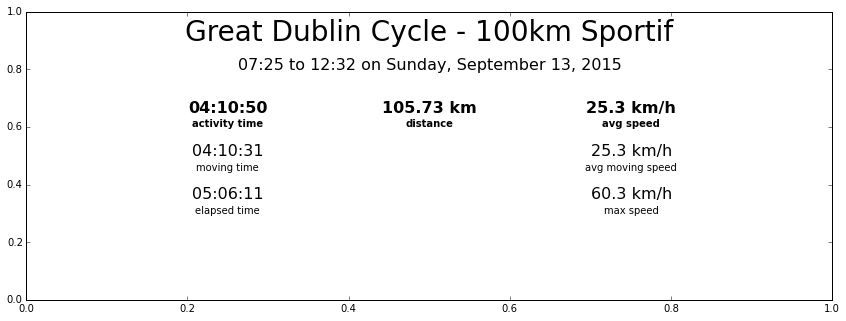

In [68]:
df_test = pd.DataFrame([1,2,3,4]) # create DataFrame
fig_test = plt.figure(figsize=(14, 20))
axes_a =  fig_test.add_axes([0.1, 0.1, 0.8, 0.2]) 
#axes_a.set_axis_off()

text_title = "Great Dublin Cycle - 100km Sportif"
text_start_time = datetime.strftime(start_time,'%H:%M on %A, %B %-d, %Y') 
text_headline_time = '{} to {} on {}'.format(start_hr_min, end_hr_min, start_day_date)
text_elapsed_time = get_duration(elapsed_time)
text_activity_time = get_duration(activity_time)
text_break_time = get_duration(break_time)
text_moving_time = get_duration(moving_time)
text_distance = '{:.2f} km'.format( distance / 1000 )
text_avg_speed_activity = '{:.1f} km/h'.format( avg_speed_activity )
text_avg_moving_speed = '{:.1f} km/h'.format( avg_speed_moving )
text_max_speed = '{:.1f} km/h'.format( max_speed ) 

axes_a.text(.5,.9,text_title, fontsize=28, ha = 'center')
axes_a.text(.5,.8,text_headline_time, fontsize=16, ha = 'center')


axes_a.text(.25,.65,text_activity_time, fontsize=16, ha = 'center', weight='bold',)
axes_a.text(.5,.65,text_distance, fontsize=16, ha = 'center', weight='bold',)
axes_a.text(.75,.65,text_avg_speed_activity, fontsize=16, ha = 'center', weight='bold',)
axes_a.text(.25,.6,'activity time', fontsize=10, ha = 'center', weight='bold',)
axes_a.text(.5,.6,'distance', fontsize=10, ha = 'center', weight='bold',)
axes_a.text(.75,.6,'avg speed', fontsize=10, ha = 'center', weight='bold',)

axes_a.text(.25,.5,text_moving_time, fontsize=16, ha = 'center')
axes_a.text(.75,.5,text_avg_moving_speed , fontsize=16, ha = 'center')
axes_a.text(.25,.45,'moving time', fontsize=10, ha = 'center')
axes_a.text(.75,.45,'avg moving speed', fontsize=10, ha = 'center')

axes_a.text(.25,.35,text_elapsed_time, fontsize=16, ha = 'center')
axes_a.text(.75,.35,text_max_speed, fontsize=16, ha = 'center')
axes_a.text(.25,.3,'elapsed time', fontsize=10, ha = 'center')
axes_a.text(.75,.3,'max speed', fontsize=10, ha = 'center')
#df_test.plot(ax = axes_a, title = 'A')

In [4]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:25:51+01:00,79.400002,76,5.010,103,53.363708,-6.190183,1,False,0.000,0.0000,False
2015-09-13 07:25:52+01:00,81.680002,77,9.626,104,53.363718,-6.190250,0,False,4.616,0.0000,False
2015-09-13 07:25:53+01:00,83.960002,79,14.242,104,53.363729,-6.190317,0,False,4.616,11.0784,True
2015-09-13 07:25:54+01:00,86.240002,80,18.858,105,53.363740,-6.190384,0,False,4.616,16.6176,True
2015-09-13 07:25:55+01:00,88.520003,82,23.474,105,53.363750,-6.190451,0,False,4.616,16.6176,True


In [74]:
#dir(axes[0].xaxis)
#dir( axes[0].xaxis.get_ticklabels()[0] )
#dir( axes[0].xaxis.get_minor_ticks()[2] )
#tick1 = axes[ plot_control['axes_number'] ].xaxis.get_minor_ticks()[0]
#dir(tick1.label)
#axes[0].get_xlim()
#axes[2].patch.set_color('blue')
import matplotlib
#matplotlib.artist.getp(fig.patch)

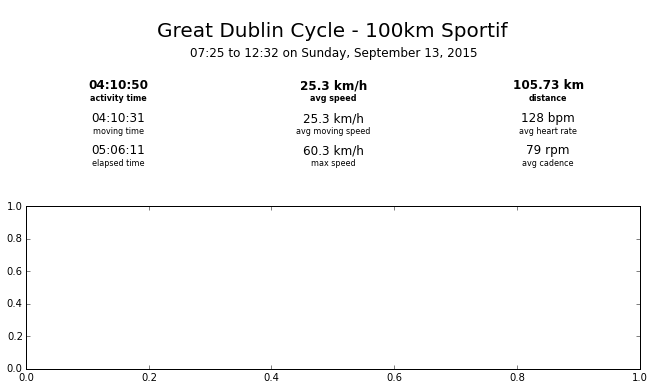

In [11]:
def get_duration(time_delta):
    hr = int(( time_delta ).total_seconds()/3600) 
    minu = int ( ( ( time_delta ).total_seconds()/3600 % 1 ) * 60) 
    sec = int ((( ( time_delta ).total_seconds()/3600 % 1 ) * 60 % 1) * 60 ) 
    return "{:02}:{:02}:{:02}".format(hr,minu,sec)

start_time = min(df.index)
end_time = max(df.index)
elapsed_time = end_time - start_time
activity_time = timedelta( seconds= int( df.breaks[~df.breaks].count() ) )
break_time = timedelta( seconds= int( df.breaks[df.breaks].count() ) )
moving_time = timedelta( seconds= int( df.moving[df.moving].count() ) )
non_moving_time = timedelta( seconds= int( df.moving[~df.moving].count() ) )

distance = max(df.distance) 

avg_speed_activity = (distance / activity_time.total_seconds()) * 3.6
avg_speed_moving = (distance / moving_time.total_seconds()) * 3.6

max_speed = df.speed.max()
avg_speed = df.speed[~df.breaks].mean()

max_heart_rate = df.heart_rate.max()
avg_heart_rate = df.heart_rate[~df.breaks].median()

max_cadence = df.cadence.max()
avg_cadence = df.cadence[~df.breaks].median()

start_day_date = datetime.strftime(start_time,'%A, %B %-d, %Y') 
start_hr_min = datetime.strftime(start_time,'%H:%M' )
end_hr_min = datetime.strftime(end_time,'%H:%M' )

text_title = "Great Dublin Cycle - 100km Sportif"
text_start_time = datetime.strftime(start_time,'%H:%M on %A, %B %-d, %Y') 
text_headline_time = '{} to {} on {}'.format(start_hr_min, end_hr_min, start_day_date)
text_elapsed_time = get_duration(elapsed_time)
text_activity_time = get_duration(activity_time)
text_break_time = get_duration(break_time)
text_moving_time = get_duration(moving_time)
text_distance = '{:.2f} km'.format( distance / 1000 )
text_avg_speed_activity = '{:.1f} km/h'.format( avg_speed_activity )
text_avg_moving_speed = '{:.1f} km/h'.format( avg_speed_moving )
text_max_speed = '{:.1f} km/h'.format( max_speed ) 
text_avg_heart_rate = '{:.0f} bpm'.format( avg_heart_rate )
text_avg_cadence = '{:.0f} rpm'.format( avg_cadence )


def output_header():
    axes[0].set_axis_off()
    axes_a = axes[0]

    y_adjust = -.075
    axes_a.text(.5,.925 + y_adjust , text_title, fontsize=20, ha = 'center')
    axes_a.text(.5,.8 + y_adjust ,text_headline_time, fontsize=12, ha = 'center')


    axes_a.text(.15,.6 + y_adjust ,text_activity_time, fontsize=12, ha = 'center', weight='bold',)
    axes_a.text(.5,.6 + y_adjust ,text_avg_speed_activity, fontsize=12, ha = 'center', weight='bold',)
    axes_a.text(.85,.6 + y_adjust ,text_distance, fontsize=12, ha = 'center', weight='bold',)
    axes_a.text(.15,.525 + y_adjust ,'activity time', fontsize=8, ha = 'center', weight='bold',)
    axes_a.text(.5,.525 + y_adjust ,'avg speed', fontsize=8, ha = 'center', weight='bold',)
    axes_a.text(.85,.525 + y_adjust ,'distance', fontsize=8, ha = 'center', weight='bold',)

    axes_a.text(.15,.4 + y_adjust ,text_moving_time, fontsize=12, ha = 'center')
    axes_a.text(.5,.4 + y_adjust ,text_avg_moving_speed , fontsize=12, ha = 'center')
    axes_a.text(.85,.4 + y_adjust ,text_avg_heart_rate , fontsize=12, ha = 'center')
    axes_a.text(.15,.325 + y_adjust ,'moving time', fontsize=8, ha = 'center')
    axes_a.text(.5,.325 + y_adjust ,'avg moving speed', fontsize=8, ha = 'center')
    axes_a.text(.85,.325 + y_adjust ,'avg heart rate', fontsize=8, ha = 'center')

    axes_a.text(.15,.2 + y_adjust ,text_elapsed_time, fontsize=12, ha = 'center')
    axes_a.text(.5,.2 + y_adjust ,text_max_speed, fontsize=12, ha = 'center')
    axes_a.text(.85,.2 + y_adjust ,text_avg_cadence , fontsize=12, ha = 'center')
    axes_a.text(.15,.125 + y_adjust ,'elapsed time', fontsize=8, ha = 'center')
    axes_a.text(.5,.125 + y_adjust ,'max speed', fontsize=8, ha = 'center')
    axes_a.text(.85,.125 + y_adjust ,'avg cadence', fontsize=8, ha = 'center')
    
figx, axes = plt.subplots(nrows=2, ncols=1,  figsize=(11, 6.4))
output_header()

In [12]:
print('{:<20}'.format('Start time:') + datetime.strftime(start_time,'%H:%M on %A, %B %-d, %Y') )
print('{:<20}'.format('End time:') + datetime.strftime(end_time,'%H:%M on %A, %B %-d, %Y') )
print('')

print ('{:<20}'.format('Elapsed time:') + '{}'.format( get_duration(elapsed_time) )   ) 
print ('{:<20}'.format('Distance:') + '{:.2f} km'.format( distance / 1000 )   ) 
print ('{:<20}'.format('Avg speed:') + '{:.1f} km/h'.format( avg_speed_activity )   ) 
print ('{:<20}'.format('Avg moving speed:') + '{:.1f} km/h'.format( avg_speed_moving )   ) 
print ('{:<20}'.format('Max speed:') + '{:.1f} km/h'.format( max_speed )   ) 
#print ('{:<20}'.format('Avg speed:') + '{:.1f} kph'.format( avg_speed )   ) 
print('')
print ('{:<20}'.format('Activity time:') + '{}'.format( get_duration(activity_time) )   ) 
print ('{:<20}'.format('Break time:') + '{}'.format( get_duration(break_time) )   ) 

print ('{:<20}'.format('Moving time:') + '{}'.format( get_duration(moving_time) )  )
print ('{:<20}'.format('Non-moving time:') + '{}'.format( get_duration(non_moving_time) )  )

print('')
print ('{:<20}'.format('Avg heart rate:') + '{:.0f} bpm'.format( avg_heart_rate )   ) 
print ('{:<20}'.format('Max heart rate:') + '{:.0f} bpm'.format( max_heart_rate )   ) 
print('')
print ('{:<20}'.format('Avg cadence:') + '{:.0f}'.format( avg_cadence )   ) 
print ('{:<20}'.format('Max cadence:') + '{:.0f}'.format( max_cadence )   ) 

Start time:         07:25 on Sunday, September 13, 2015
End time:           12:32 on Sunday, September 13, 2015

Elapsed time:       05:06:11
Distance:           105.73 km
Avg speed:          25.3 km/h
Avg moving speed:   25.3 km/h
Max speed:          60.3 km/h

Activity time:      04:10:50
Break time:         00:55:21
Moving time:        04:10:31
Non-moving time:    00:55:40

Avg heart rate:     128 bpm
Max heart rate:     162 bpm

Avg cadence:        79
Max cadence:        128


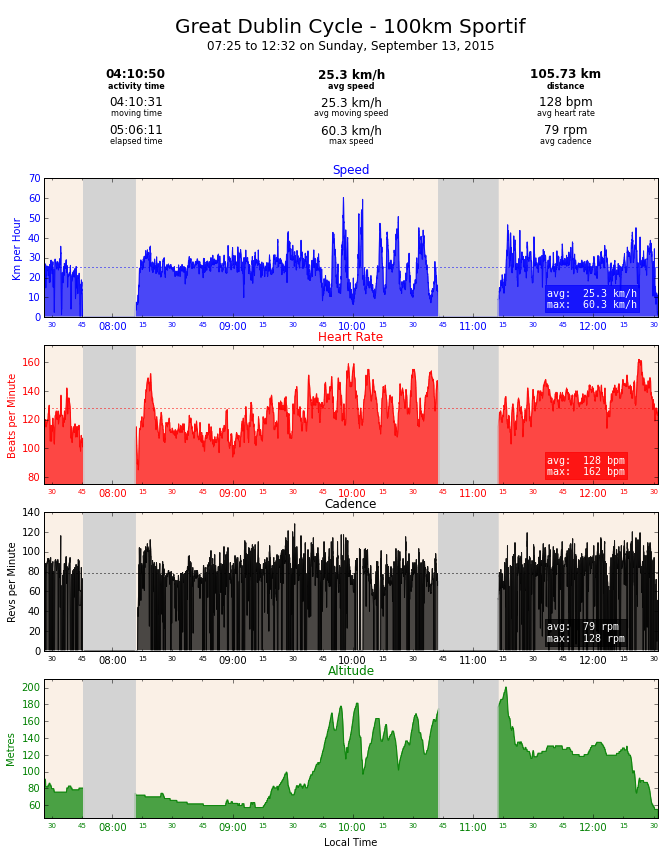

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))
#fig.patch.set_color('red')
#import matplotlib.gridspec as gridspec

#fig = plt.figure()
#axes = gridspec.GridSpec(4, 1,
#                       height_ratios=[2,1,2,1]
#                       )

#Speed


output_header()

plot_control = {'column':'speed', 'axes_number':1, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes(df, plot_control)
#axes[0].set_axis_bgcolor('linen')

#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':2, 'plot_color':'red', 'show_avg': True, 'units':'bpm',
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes(df, plot_control)


#Cadence
plot_control = {'column':'cadence', 'axes_number':3, 'plot_color':'black', 'show_avg': True, 'units':'rpm',
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes(df, plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':4, 'plot_color':'green', 'show_avg': False, 'units':'m',
                'plot_title':'Altitude', 'xlabel': 'Local Time', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes(df, plot_control)

#text_avg_heart_rate = '{:.0f} bpm'.format( avg_heart_rate )
#text_avg_cadence = '{:.0f} rpm'.format( avg_cadence )



fig.savefig('summary_local_time.png', bbox_inches='tight')

In [75]:
fig.savefig('/opt/jupyter/data/test.png')

In [24]:
#fig.patch.set_color('yellow')
#dir(fig.patch)
#dir(fig.get_axes()[1])
#fig.get_axes()[1].get_xlabel()

In [122]:
#df_moving.reset_index()
df_moving = df_moving.set_index(pd.timedelta_range('0 days',periods=len(df_moving),freq='s'))

In [55]:
df_moving.head()

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
0,2015-09-13 07:25:53+01:00,83.960002,79,14.242000,104,53.363729,-6.190317,0,False,4.616000,11.078400,True
1,2015-09-13 07:25:54+01:00,86.240002,80,18.858000,105,53.363740,-6.190384,0,False,4.616000,16.617600,True
2,2015-09-13 07:25:55+01:00,88.520003,82,23.474000,105,53.363750,-6.190451,0,False,4.616000,16.617600,True
3,2015-09-13 07:25:56+01:00,90.800003,83,28.090000,106,53.363761,-6.190519,5,False,4.616000,16.617600,True
4,2015-09-13 07:25:57+01:00,90.800003,84,34.740002,106,53.363779,-6.190614,1,False,6.650002,19.058402,True


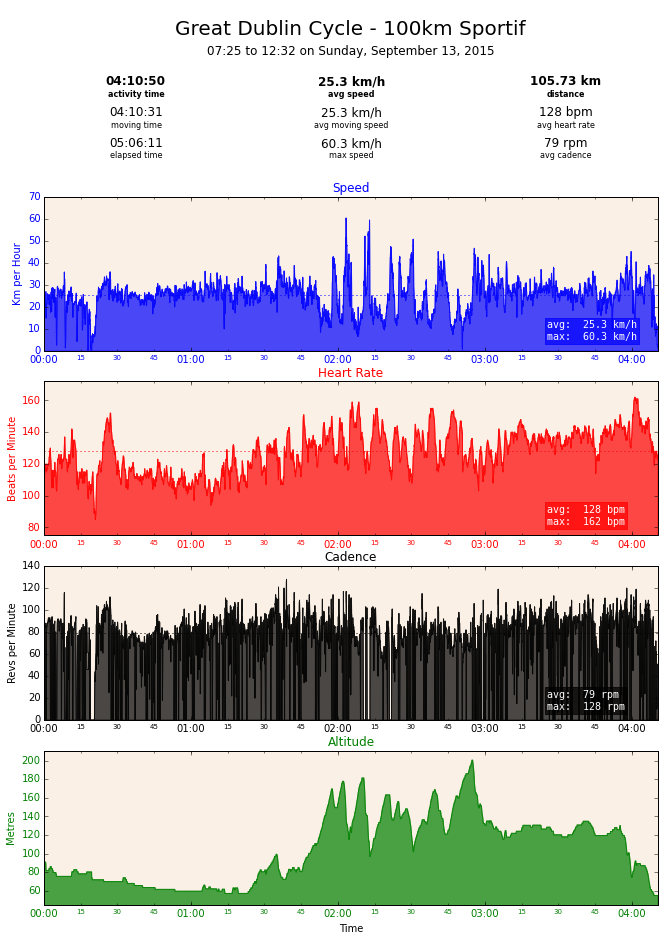

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

output_header()

#Speed
plot_control = {'column':'speed', 'axes_number':1, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes2(df_moving, plot_control)

#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':2, 'plot_color':'red', 'show_avg': True, 'units':'bpm',
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes2(df_moving, plot_control)

#Cadence
plot_control = {'column':'cadence', 'axes_number':3, 'plot_color':'black', 'show_avg': True, 'units':'rpm',
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes2(df_moving, plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':4, 'plot_color':'green', 'show_avg': False, 'units':'m',
                'plot_title':'Altitude', 'xlabel': 'Time', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes2(df_moving, plot_control)

fig.savefig('summary_activity_time.png', bbox_inches='tight')

In [143]:
x = [123, 789, 1111, 1988, 2111, 2888]
for num in x:
    print(str(int (num / 1000) ) )

0
0
1
1
2
2


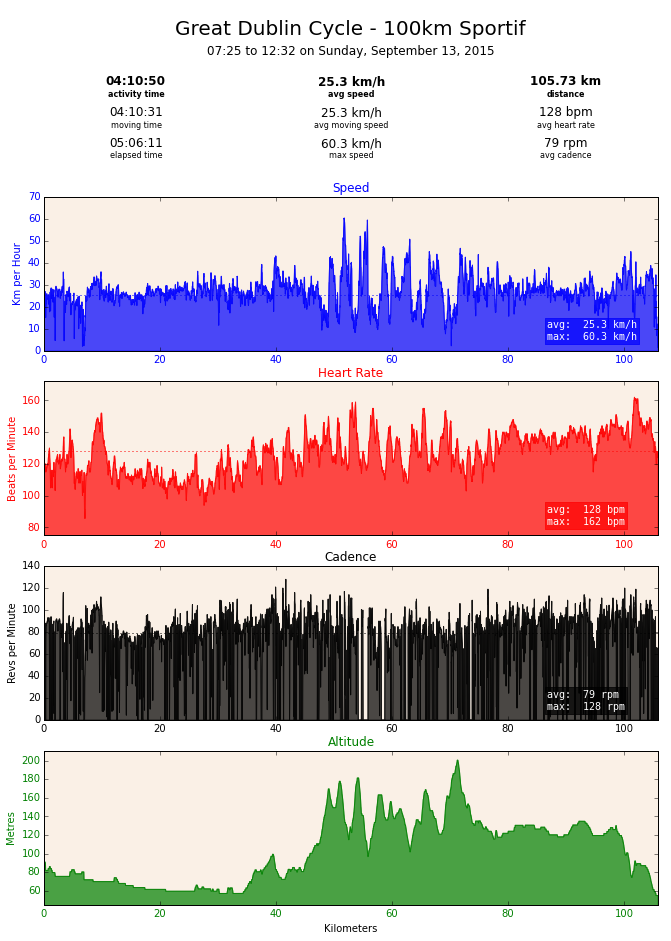

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

output_header()

#Speed
plot_control = {'column':'speed', 'axes_number':1, 'plot_color':'blue', 'show_avg': True, 'units':'km/h',
                'plot_title':'Speed', 'xlabel': '', 'ylabel':'Km per Hour', 'ylimit_qty':0}
plot_axes3(df_moving, plot_control)

#Heart Rate
plot_control = {'column':'heart_rate', 'axes_number':2, 'plot_color':'red', 'show_avg': True, 'units':'bpm',
                'plot_title':'Heart Rate', 'xlabel': '', 'ylabel':'Beats per Minute', 'ylimit_qty':10}
plot_axes3(df_moving, plot_control)

#Cadence
plot_control = {'column':'cadence', 'axes_number':3, 'plot_color':'black', 'show_avg': True, 'units':'rpm',
                'plot_title':'Cadence', 'xlabel': '', 'ylabel':'Revs per Minute', 'ylimit_qty':0}
plot_axes3(df_moving, plot_control)


#Altitude
plot_control = {'column':'altitude', 'axes_number':4, 'plot_color':'green', 'show_avg': False, 'units':'m',
                'plot_title':'Altitude', 'xlabel': 'Kilometers', 'ylabel':'Metres', 'ylimit_qty':10}
plot_axes3(df_moving, plot_control)
fig.savefig('summary_distance.png', bbox_inches='tight')

In [98]:
df_moving.head()

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving,interval10
0,2015-09-13 07:25:53+01:00,83.960002,79,14.242000,104,53.363729,-6.190317,0,False,4.616000,11.078400,True,20
1,2015-09-13 07:25:54+01:00,86.240002,80,18.858000,105,53.363740,-6.190384,0,False,4.616000,16.617600,True,20
2,2015-09-13 07:25:55+01:00,88.520003,82,23.474000,105,53.363750,-6.190451,0,False,4.616000,16.617600,True,30
3,2015-09-13 07:25:56+01:00,90.800003,83,28.090000,106,53.363761,-6.190519,5,False,4.616000,16.617600,True,30
4,2015-09-13 07:25:57+01:00,90.800003,84,34.740002,106,53.363779,-6.190614,1,False,6.650002,19.058402,True,40


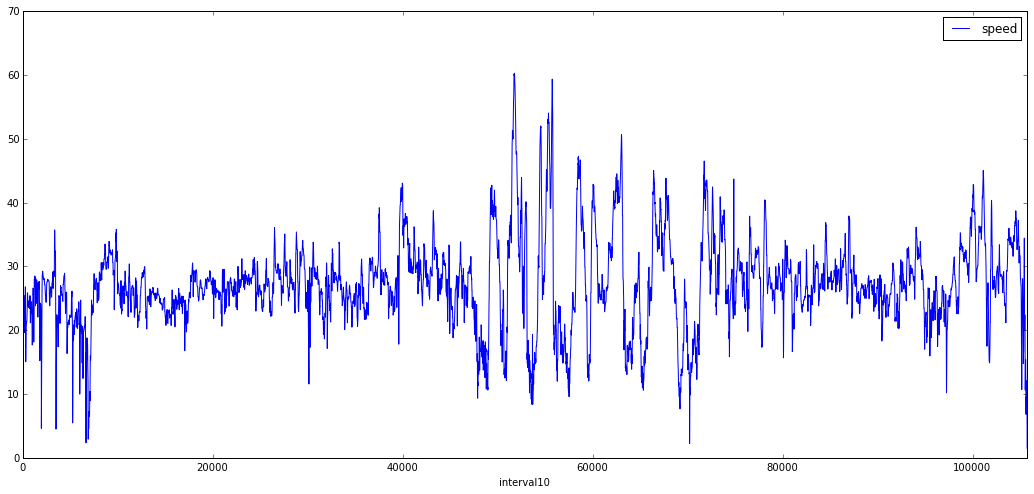

In [99]:
df_moving[['interval10','speed']].groupby('interval10').mean().plot(figsize=(18, 8))

In [112]:
df_moving[['interval10','heart_rate']].groupby('interval10').mean().tail()

,heart_rate
interval10,
105700,127.000000
105710,126.250000
105720,126.000000
105730,124.090909
105740,124.666667


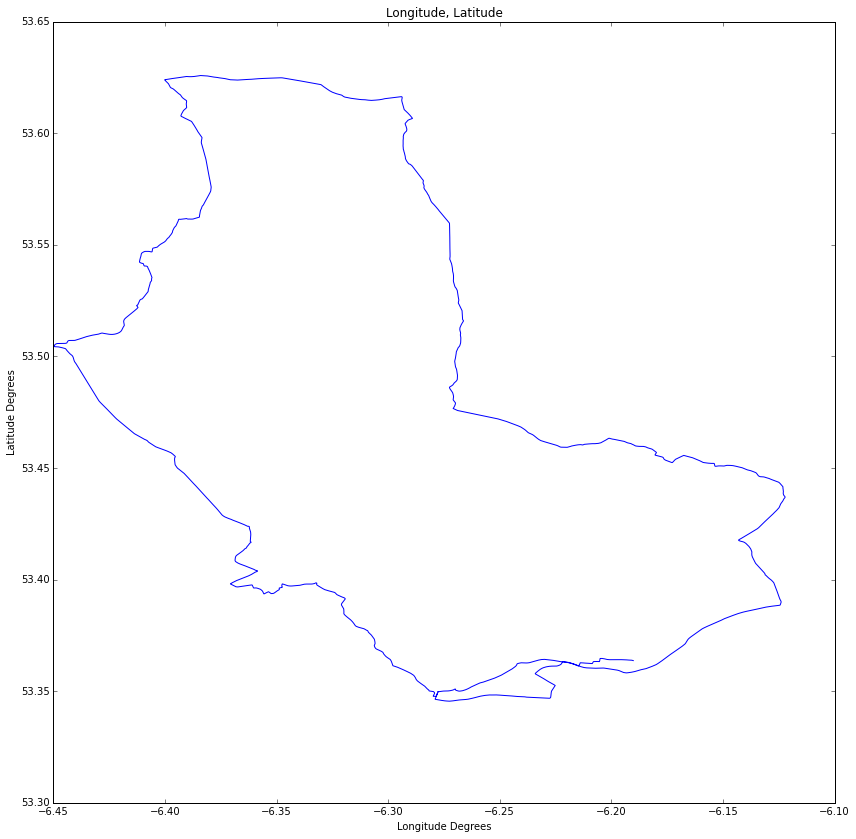

In [113]:
# new style method 2; use an axes array

fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

In [103]:
df[ ( ~df.breaks) & (~df.moving)].tail()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:45:36+01:00,80.199997,0,6910.22998,104,53.349805,-6.277627,0,False,0,0,False
2015-09-13 07:45:37+01:00,80.199997,0,6910.22998,104,53.349804,-6.277628,0,False,0,0,False
2015-09-13 07:45:38+01:00,80.199997,0,6910.22998,104,53.349804,-6.277630,0,False,0,0,False
2015-09-13 07:45:39+01:00,80.199997,0,6910.22998,104,53.349803,-6.277631,0,False,0,0,False
2015-09-13 07:45:40+01:00,80.199997,0,6910.22998,104,53.349803,-6.277632,10,False,0,0,False
